### Student Details

Student name: Elsa Anza Martín

Student ID: 21272808

# Option 2: Linear and non-linear SVM

## Part 2: Probability outputs from Support Vector Machines

Support Vector Machines do not natively give a probability output, unlike Logistic Regression. However, it is possible to extend SVM to give a probability output. The exact details of how scikit-learn does this are given in [1], but you don't need to know all the details, and don't worry about reading the paper. Suffice to say, it is feasible to extend SVMs to give a probabilistic output, but this comes with significant extra processing cost.

1. Train a linear SVM on the same data as previous part of this task, but enable probability (literally, set `probability=True` in the SVC constructor)
2. Generate several thousand examples (e.g. 5000) within a valid range (e.g. in this case, both axes between -2.5 and +2.5 as the data is normalised). Make sure the generation is uniform.
3. Use the `predict_proba()` function to predict the probability of each sample falling within a class. A probability for each class will be returned for each sample (i.e. it will be a matrix of size (5000, 3))
4. Provide three scatter plots of our random samples, with the colour showing the probability (you can just use `c=probas[:,0]` and so on, which will provide a scaling from blue to yellow)

[1] Wu, Lin and Weng, “Probability estimates for multi-class classification by pairwise coupling”, JMLR 5:975-1005, 2004.


In [ ]:
################################
# Your code here
#importing data 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('iris_data.csv', header=0)
df

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2], inplace=True)
df

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#import petal length and petal width 
X = df.iloc[:, [2,3]].values

#labels is class
y = df.iloc[:,4].values

In [ ]:
#split train and test values
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.3, stratify=y)

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
#train SVC
import numpy as np
import sklearn
from sklearn.svm import SVC
clf = sklearn.svm.SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
pl = np.random.uniform(low=-2.5, high=2.5, size=5000) #loc = mean, scale = std, size = no samples
pl[0:20] #print 20 first generated values

array([-2.31678063,  0.99611094,  2.03664805,  2.37285978, -0.61397118,
       -1.90924795,  0.92928621, -0.37601714,  0.25521277, -0.11028965,
       -0.79436295, -0.3690952 , -0.87343961,  2.04512209,  0.22389225,
        1.04564958, -0.52756922, -1.70275331,  0.93930425, -0.33226008])

In [ ]:
pw = np.random.uniform(low=-2.5, high=2.5, size=5000) #loc = mean, scale = std, size = no samples
pw[0:20] #print 20 first generated values

array([ 0.37249899,  1.09413264,  2.01362698, -1.71975355, -0.70577799,
        0.43439244, -0.10309443,  1.63839175,  1.45769306, -1.20668735,
       -0.38127816, -1.50867806, -0.3725287 ,  2.18717907,  2.10484423,
       -0.1283602 ,  1.35789527, -0.21489336,  1.33707544,  0.07600932])

In [ ]:
new_X = pd.DataFrame(pl, columns=['petal length'])
new_X['petal width'] = pw
new_X

,petal length,petal width
0,-2.316781,0.372499
1,0.996111,1.094133
2,2.036648,2.013627
3,2.372860,-1.719754
4,-0.613971,-0.705778
...,...,...
4995,-1.374834,-0.073283
4996,-1.250616,-2.366778
4997,-0.351248,0.698854
4998,1.403075,-1.085008


In [ ]:
probas = clf.predict_proba(new_X)

In [ ]:
new_X['probas1'] = probas[:,0]
new_X['probas2'] = probas[:,1]
new_X['probas3'] = probas[:,2]
new_X

,petal length,petal width,probas1,probas2,probas3
0,-2.316781,0.372499,8.964460e-01,7.977940e-02,0.023775
1,0.996111,1.094133,9.034927e-03,5.950883e-03,0.985014
2,2.036648,2.013627,6.736174e-07,8.075277e-07,0.999999
3,2.372860,-1.719754,2.922580e-03,9.831566e-01,0.013921
4,-0.613971,-0.705778,5.419285e-01,4.078359e-01,0.050236
...,...,...,...,...,...
4995,-1.374834,-0.073283,6.735460e-01,2.815578e-01,0.044896
4996,-1.250616,-2.366778,9.949386e-01,2.201377e-03,0.002860
4997,-0.351248,0.698854,1.790316e-02,9.527804e-01,0.029316
4998,1.403075,-1.085008,8.368743e-03,9.855298e-01,0.006101


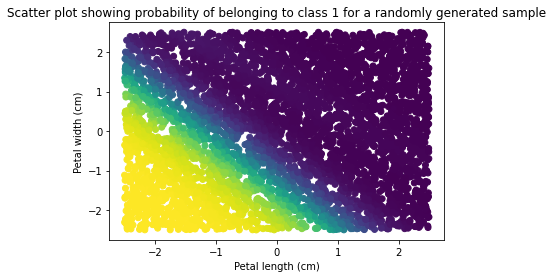

In [ ]:
c=new_X['probas1']

x = new_X['petal length']
y = new_X['petal width']
plt.scatter(x, y, c = c)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

plt.title("Scatter plot showing probability of belonging to class 1 for a randomly generated sample")

plt.show()

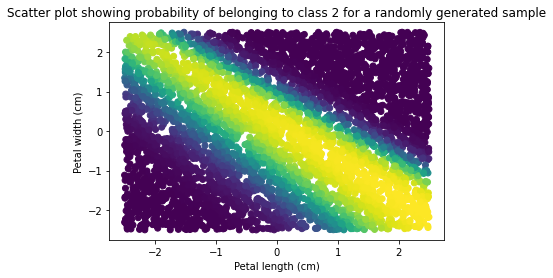

In [ ]:
c=new_X['probas2']

x = new_X['petal length']
y = new_X['petal width']
plt.scatter(x, y, c = c)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

plt.title("Scatter plot showing probability of belonging to class 2 for a randomly generated sample")

plt.show()

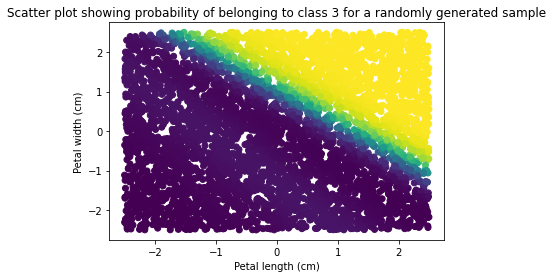

In [ ]:
c=new_X['probas3']

x = new_X['petal length']
y = new_X['petal width']
plt.scatter(x, y, c = c)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

plt.title("Scatter plot showing probability of belonging to class 3 for a randomly generated sample")

plt.show()

## Part 3: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Repeat for the multi-class Iris data.

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

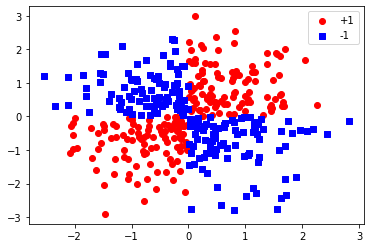

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

In [28]:
#split train and test values
from sklearn.model_selection import train_test_split

(X_r_train, X_r_test, y_r_train, y_r_test) = train_test_split(X_r, y_r, test_size= 0.3, stratify=y_r)

In [29]:
clf = sklearn.svm.SVC(kernel='rbf', gamma=0.1)
clf.fit(X_r_train, y_r_train)
y_pred = clf.predict(X_r_test)

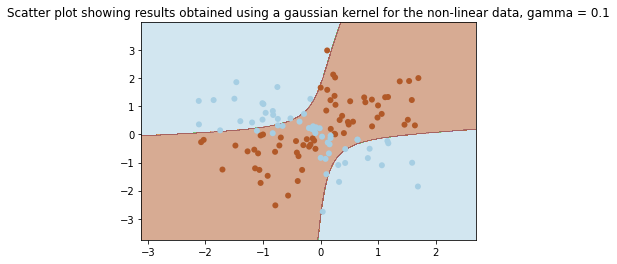

In [30]:
from plot_decision_boundary import plot_decision_boundary
plot_decision_boundary(X_r_test,y_r_test, clf)
plt.title("Scatter plot showing results obtained using a gaussian kernel for the non-linear data, gamma = 0.1")
plt.show()

Change the gamma value to 100. What happens? What is the problem with this result?
Larger gamma values causes the boundaries of the second class to be narrower (overfitting). The model fails to generalize enough and therefore fails to correctly separate the data.


In [33]:
clf = sklearn.svm.SVC(kernel='rbf', gamma=100)
clf.fit(X_r_train, y_r_train)
y_pred = clf.predict(X_r_test)

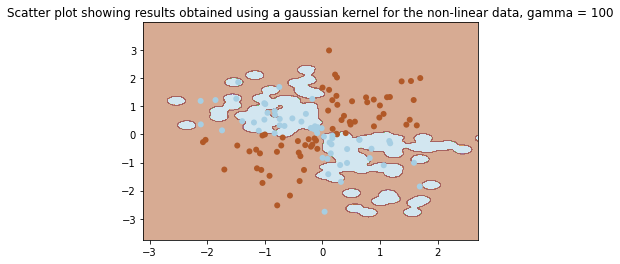

In [34]:
plot_decision_boundary(X_r_test,y_r_test, clf)
plt.title("Scatter plot showing results obtained using a gaussian kernel for the non-linear data, gamma = 100")
plt.show()

In [35]:
clf = sklearn.svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

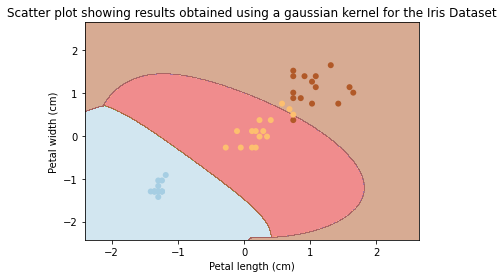

In [36]:
plot_decision_boundary(X_test,y_test, clf)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatter plot showing results obtained using a gaussian kernel for the Iris Dataset")
plt.show()

## Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9111111111111111